# Geospatial Analysis with GeoPandas

## Introducción

En este micro-curso, vamos a aprender diferentes métodos para manipular y visualizar datos geoespaciales, es decir datos que estan asociados a una localización geográfica.

<center>
<img src="geomaps-examples.jpg" width="920" align="center"><br/>
</center>

En esta primera presentación, cubriremos rapidamente los pre-requisitos necesarios para completar este curso y daremos los primeros pasos con la visualizacion de nuestro primer conjunto de datos geoespaciales.

## Leyendo datos geoespaciales

El primer paso es ver como leer nuestros datos geoespaciales! Para eso en Python debemos importar la biblioteca **geopandas**, junto con las otras bibliotecas tradicionales para el analisis de datos:

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

Hay muchos formatos de archivos diferentes para datos geoespaciales, tales como **shapefile**, **GeoJSON**, **KML** y **GPKG**. En este curso no vamos a discutir la diferencia entre ellos, pero es importante saber que:
* **shapefile** es el formato de datos geoespaciales más común con el que nos vamos a encontrar.
* todos estos tipos de archivos se puede cargar facilmente con la funcion `gpd.read_file()` de **geopandas**

El siguiente bloque de código carga un archivo en formato **shapefile** con información sobre los bosques, areas silvesters y otros territorios bajo cuidado del **Departamento de Conservación Ambiental** en el estado de Nueva York en Estados Unidos.

In [3]:
# Read in the data
full_data = gpd.read_file("../input/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head(3)

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."


Pare el resto de este tutorial vamos a considerar un escenario donde querríamos usar estos datos para planificar un fin de semana de camping. En ves de basarnos en el caos de los reviews en la Internet, decidimos crear nuestro propio mapa para ajustar nuestro recorrido a nuestros intereses.

### Prerequisites

Para ver las primeras filas de nuestros datos usamos el mismo metodo `head()` que usamos antes para visualizar un DataFrame de Pandas. Por ejemplo se puede ver en la columna **FACILITY** que las primeras 2 filas corresponden a un mismo bosque.

Esto es porque GeoPandas representa sus datos con un objeto (GeoPandas) **GeoDataFrame**, que es una extension totalmente compatible del **DataFrame** de **Pandas**:

In [6]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

Por lo tanto cada método o funcion que podríamos usar con un DataFrame tradicional también va s funcionar con este tipo de datos! 

Por ejemplo, podemos seleccionar un subconjunto de ellas usando el operador `.loc[]`, tal cual como lo haríamos con cualquier DataFrame:

In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]]
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


Podemos usar el método `value_counts()` para ver los diferentes tipos de tierras (columna **CLASS**) y cuantas veces aparece cada uno en los datos:

In [9]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

También podemos usar los métodos de indexado con **loc** (o **iloc**) junto a **isin** para filtrar un subconjunto de datos en base a cierta condición:

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])]
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


A lo largo de este cursillo vamos a usar repetidamente estos métodos de manipulación de datos en **Pandas** para entender y filtrar los datos antes de crear los mapas.

## Creando el primer mapa!

Podemos visualizar facilmente nuestros datos geoespaciales invocando el método `plot()` de **matplotlib**. El argumento opcional **column** permite especificar una columna cuyos valores se usan para colorear cada region en el mapa:

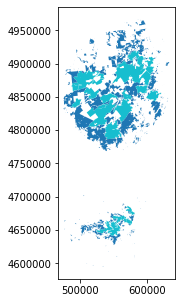

In [7]:
import matplotlib.pyplot as plt
ax = wild_lands.plot(column='CLASS', figsize=(5,5))
plt.show()

Por convención cada objeto **GeoDataFrame** contiene una columna especial **geometry**, la cual contiene todos los objetos geométricos que son desplegados cuando se ejecuta el metodo `plot()`.

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

Esta columna puede contener muchos tipos diferentes de formas, pero tipicamente cada entrada va a ser de uno de **Point**, **LineString** o **Polygon**.

<img src="geometry-datatypes.png" alt="drawing" align="center" width="720"/>

La columna **geometry** en nuestro dataset contiene 2983 objetos **Polygon**, cada uno correspondiendo a una silueta en el gráfico anterior.

En la siguiente celda cargamos 3 nuevos GeoDataFrames, cada uno conteniendo:
* las ubicaciones de camping (**Point**)
* los senderos de caminatas (**LineString**)
* los limites de condados (**Polygon**)

In [9]:
# Campsites in New York state (Point)
poi_data = gpd.read_file("../input/DEC_pointsinterest/Decptsofinterest.shp")
campsites = poi_data.loc[poi_data.ASSET=='PRIMITIVE CAMPSITE']

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL']

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/NY_county_boundaries/NY_county_boundaries.shp")

A continuación creamos un mapa combinando la informacion en los cuatro **GeoDataFrames** anteriores.

El método `plot()` acepta varios parámetros opcionales que pueden ser usados para customizar la apariencia del gráfico.

En este caso lo más importante es especificar un valor para el parámetro **ax** de modo que toda la información sea graficada en el mismo mapa:

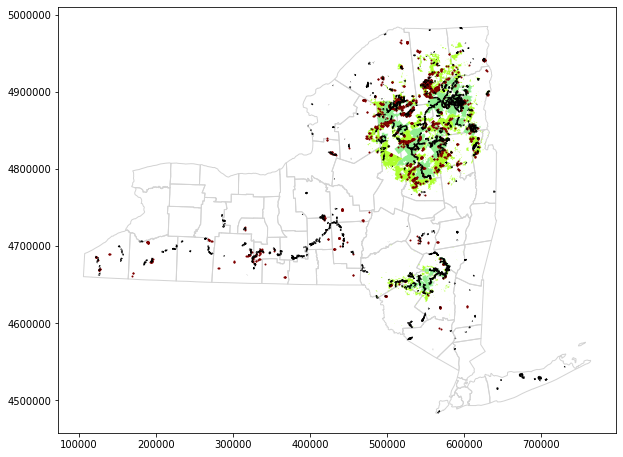

In [10]:
from pylab import *

# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='lightgray', zorder=0)

# Add wild lands, campsites, and foot trails to the base map
cmap = mpl.colors.ListedColormap(['greenyellow', 'lightgreen'])
wild_lands.plot(column='CLASS', cmap=cmap, ax=ax, zorder=1)
campsites.plot(color='maroon', markersize=1, ax=ax, zorder=2)
trails.plot(color='black', markersize=0.5, ax=ax, zorder=3)
plt.show()

A partir de mapa anterior vemos que el norte del estado parece ser la mejor opción para un buen viaje de camping!